<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Audio por computadora: tratamiendo de sonido</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Introducción</span>

En el campo del aprendizaje profundo se habla, en principal medida, de trabajar con datos de caracter visual o texto. Pero, por supuesto, hay otros tipos de datos y tareas, entre ellos lo relacionado con Audio(.mp3, .wav, etc.). Al inicio se puede pensar que el uso de estas difiere extensamente de lo que ya hemos visto, pero de hecho vamos a tener que utilizar mucho de lo que hemos aprendido hasta ahora.

## <span style="color:blue">el audio y cómo lo representamos</span>

El audio son las **señales de los sonidos**. Ondas producidas por la variación en la presión del aire. Para representar estas señales se grafica esta presión o "altitud" a través del tiempo. Estas son las "Formas de onda" o "Waveforms". Hay varias de estas formas, pero la clásica a la hora de representar las ondas "análogas" son las ondas sinoidales

<figure>
<center>
<img src="../Imagenes/soundwave.png" width="500" height="300" align="center"/> 
</center>
</figure>
Tenemos algunos terminos importantes aquí:

- **Amplitud**: El valor máximo de la onda.
- **Periodo** : Tiempo que se toma la señal para completar una onda.
- **Frecuencia**: Número de ondas generadas en un periodo determinado de tiempo. Usualmente por segundo.

Esto es como tal la representación de un sonido muy sencillo, en el mundo real, se tienen principalmente señales compuestas, las cuales no tienen formas "perfectas".


<figure>
<center>
<img src="../Imagenes/waveform.jpg" width="700" height="300" align="center"/> 
</center>
</figure>

### <span style="color:blue">Digitalización del Audio</span>

El primer problema que se encuentra al trabajar con sonido es el paso al procesamiento digital. 

Cuando hemos trabajado con imágenes, por lo menos en la época actual, la mayoría de fotos y demás se toman o se generan digitalmente. Así que el proceso de transformación de "Foto" a "Matriz" es un proceso sencillo e inmediato.

En el caso del audio, estas son señales análogas, lo que significa que tanto la información de la amplitud como el tiempo sobre la que las representamos toman valores continuos(Son números reales). Para poder pasarlo por un computador y no perder memoria en el intento es necesario pasarlo a una "Señal Digital", las cuales se representan como una secuencia de valores discretos, y los datos de interés solo toman un número finito de datos. ¿Cómo hacemos esto? Haciendo un muestreo.

<figure>
<center>
<img src="../Imagenes/sampling.jpeg" width="500" height="350" align="center"/> 
</center>
</figure>

en lugar de tomar la onda completa, se medirá la amplitud entre intervalos fijos de tiempo. Cada una de estas medidas será una muestra, y el número de estas muestras dentro de un segundo es la "rata de muestreo", cuya medición está en Hertz "Hz". El caso más clasico de rata de muestreo es de 44100hz por segundo, o 44100 muestras de amplitud por segundo.


<figure>
<center>
<img src="../Imagenes/analog-vs-digital.jpg" width="500" height="400" align="center"/> 
</center>
</figure>

## <span style="color:blue">Audio a imágenes</span>

Como ya tenemos la forma de pasar estos datos externos a nuestras máquinas, es hora de procesarlas para pasarlas a las redes neuronales.

Interesantemente, no se trabajará con los datos en su forma pura, en su lugar, vamos a obtener información de los archivos de audio y los convertiremos en una imagen, algo que ya estamos completamente acostumbrados

### <span style="color:blue">Espectro</span>

Como dijimos, la amyoría de audios en el mundo real no son señales sencillas, pero en realidad son señales compuestas de otras más pequeñas. Y al sumar sus amplitudes tenemos ob

Con las formas que acabamos de ver, no necesariamente vemos la representación completa de las dichas señales que están sucediendo a la vez. Aquí es donde entra el espectro. En lugar de graficar la amplitud a través del tiempo, se hacen sobre todas las frecuencias encontradas en esta señal compuesta.

<figure>
<center>
<img src="../Imagenes/spectrum.gif" width="500" height="300" align="center"/> 
</center>
</figure>

### <span style="color:blue">Espectrograma</span>

Debido a que las señales de audio producen diferentes sonidos a través del tiempo, significa que sus frecuencias De igual forma van a variar a medida que pasa el tiempo. En otras palabras, y como vimos en la representación anterior, el espectro va a cambiar a través del tiempo. Esto es lo que es un espectrograma.

Aquí se grafican tres cosas: en el eje Y se grafican la frecuencia, en el eje X el tiempo, y los diferentes colores representan las amplitudes. Entre más brillante, mayor la amplitud. 

<figure>
<center>
<img src="../Imagenes/spectrogram.png" width="800" height="500" align="center"/> 
</center>
</figure>

Aquí tenemos tres de las características más importantes del audio representadas en una gráfica. o mejor dicho, en una imagen. La cual podemos alimentar a una red Convolucional que siga las ideas que hemos trabajado hasta ahora.

Empecemos a ver esto en código. Vamos a usar un fragmento de una canción para observar este pequeño proceso

Podemos agregar el audio a usar directamente en las celdas de jupyter

In [1]:
from IPython.display import Audio
Audio("../Audios/audio_sample.wav")

Ahoira usamos librosa para el procesamiento.

Pytorch también tiene una librería propia para esto mismo, llamada "TorchAudio", que tiene menos capacidades, pero es especializada para los trabajos de aprendizaje profundo

In [16]:
import librosa
import numpy as np

samples, sample_rate = librosa.load("../Audios/audio_sample.wav", sr = None)

la función `load` hace el proceso del muestreo por nosotros, solo hay que decirle la rata de mueestreo. Para que este trabaje en el clásico 44100 Hz, ponemos el parámetro `sr=None`

Vamos a visualizar la forma de Onda

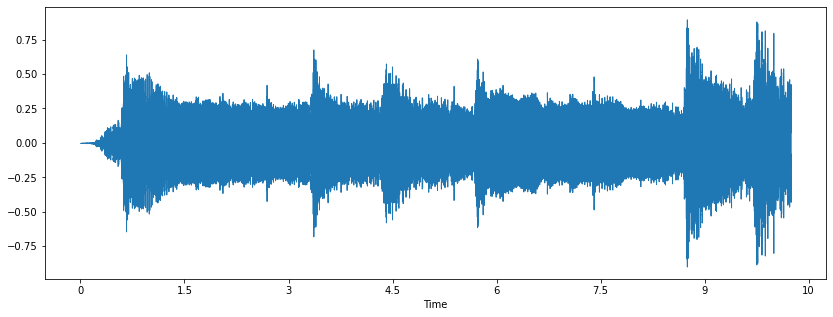

In [11]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
librosa.display.waveshow(samples, sr=sample_rate)

Ahora obtendremos el espectrograma. Esto se hace a partir de "Transformaciones de Fourier", las cuales, en muy resumidas cuentas, descompone la señal en las frecuencias compuestas y grafica la emplitud de cada una de estas.

Librosa(y casi, sino todas, las librerías de audio) tienen su propia función para estas trasnformaciones. Esta función separa el audio en pequeños segmentos y aplica Fourier en casa uno de estos

/home/thejarmanitor/miniconda3/envs/torch-gpu/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


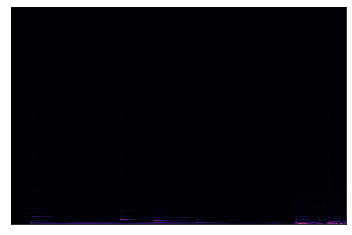

In [13]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

Pero ¿Qué pasó aquí? ¿Dónde está el color? No hay información

Esto es debido a que los humanos percibimos más las diferencias entre frecuencias cuando estas son bajas. En lugar de escuchar frecuencias de forma lineal, las percibimos en una escala logarítmica.

Ejemplo: Si escucharamos dos pares de frecuencias, una entre 100 Hz y 200 Hz y otra de 1000 Hz y 1100 Hz, en el primer par seremos mucho más conscientes de la diferencia, mientras que en el segundo casi no se notará. A pesar de que la diferencias entre estas es del mismo valor (100 Hz), en el primer caso es un aumento del 100%, mientras que en el segundo es solo 10%.

A razón de tomar en cuenta esa forma de la percepción del sonido, se crea una transformación llamada la "Escala de Mel", la cual hace que los escuchas tengan una percepción equidistante.


<figure>
<center>
<img src="../Imagenes/Mel-Hz_plot.png" width="450" height="200" align="center"/> 
</center>
</figure>

No hay un cálculo específico de esta escala, pero un ejemplo de función puede ser el siguiente:

\begin{align}
    m = 2595 \log_{10}\left( 1+\frac{f}{700} \right) = 1127 \ln\left( 1+\frac{f}{700} \right)
\end{align}


Veamos lo que pasa si utilizamos esta escala antes de hacer el espectrograma

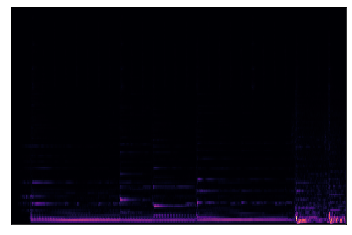

In [14]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

Ha mejorado, pero aún falta otra parte.

Al igual que la frecuencia, la amplitud también tiene una escala logarítmica, razón por la cual también necesitamos transformarla.

en este caso usamos la escala de decibeles


<figure>
<center>
<img src="../Imagenes/decibel-scale.jpg" width="380" height="450" align="center"/> 
</center>
</figure>


Aplicamos esa transformación al espectrograma de Mel

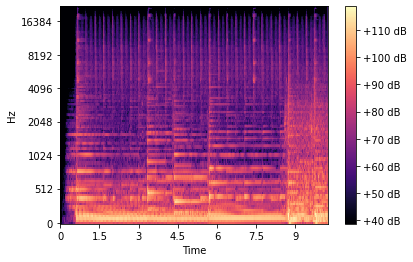

In [17]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

Obtenemos exactamente lo que buscamos. Una imagen que represente el sonido.

Pasaremos ahora a aplicarlo

Usaremos el Dataset "ESC-50"(Environmental Sound Classification), este dataset contiene audios de 5 segundos de 50 clases diferentes, con 40 ejemplos cada uno

In [20]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook as tqdm
import os

if torch.cuda.is_available():
  device=torch.device('cuda:0')
else:
  device=torch.device('cpu')

In [ ]:
#!wget --no-check-certificate https://github.com/karoldvl/ESC-50/archive/master.zip \
#    -O /mnt/storage/Datasets/ESC-50/ESC-50-master.zip

In [9]:
import zipfile

local_zip = '/mnt/storage/Datasets/ESC-50/ESC-50-master.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/mnt/storage/Datasets/ESC-50')
zip_ref.close()

folder_path = '/mnt/storage/Datasets/ESC-50/ESC-50-master/'

Vamos antes a definir un par de funciones de pre procesamiento

Primero la función para generar el espectrograma de mel usando decibeles

In [5]:
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    #sr= rata de muestreo
    #n_fft= número de muestras para cada ventana
    #hop_length= número de muestras que se salta para la siguiente ventana de tiempo
    #n_mel= número de filtros de mel, o la altura de la imagen del espectrograma
  wav, sr = librosa.load(file_path,sr=sr)
  if wav.shape[0]<5*sr:
    wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:5*sr]
  spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,
              hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
  spec_db=librosa.power_to_db(spec,top_db=top_db)
  return spec_db

siguiente una función para pasar los espectrogramas a imágenes

In [6]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

Veamos el archivo csv que contiene las clases de las imágenes

In [11]:
df = pd.read_csv(folder_path+'meta/esc50.csv')

df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [12]:
train = df[df['fold']!=5]
valid = df[df['fold']==5]

Hagamos un ejemplo ahora de uno de los archivos de audio

In [13]:
wav, sr = librosa.load(folder_path+'audio/1-100032-A-0.wav', sr=None)
print(f'La rata de muestreo es {sr} y la longitud del audio es de {len(wav)/sr} segundoss')

La rata de muestreo es 44100 y la longitud del audio es de 5.0 segundoss


/tmp/ipykernel_38920/705459937.py:3: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(wav, sr)


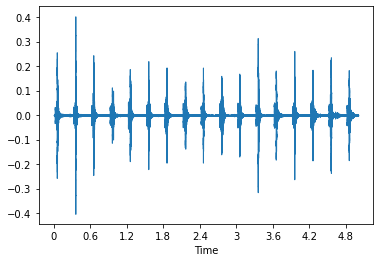

In [17]:
filename = valid[valid['category']=='clock_tick'].iloc[0]['filename']
wav, sr = librosa.load(folder_path+'audio/'+filename, sr=None)
librosa.display.waveshow(wav, sr)

/tmp/ipykernel_38920/1646117095.py:13: FutureWarning: Pass y=[-0.00018311 -0.00027466 -0.00015259 ... -0.0010376  -0.00115967
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,


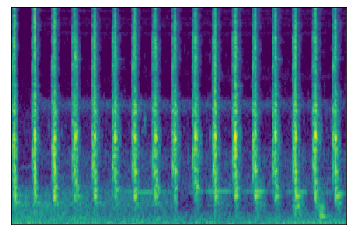

In [19]:
librosa.display.specshow(spec_to_image(get_melspectrogram_db(folder_path+'audio/'+filename, sr)), cmap='viridis')

Debido a lo especial de estos datos de 

In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm #paquete de barras de progreso
class ESC50Data(Dataset):
  def __init__(self, base, df, in_col, out_col):
    self.df = df #base de datos con información
    self.data = [] #las imagenes nuevas que vamos a generar
    self.labels = [] #las categorías de las respectivas imagenes
    self.c2i={} #diccionario de característica a índice
    self.i2c={} #diccionario de índice a característica
    self.categories = sorted(df[out_col].unique()) #valores únicos de las categorías, deben ser 50
    for i, category in enumerate(self.categories): #agregamos los valores a los diccionarios
      self.c2i[category]=i
      self.i2c[i]=category
    for ind in tqdm(range(len(df))): #otra forma de enumerate pero agregando barras de progreso al loop
      row = df.iloc[ind] #iteramos sobre cada fila
      file_path = os.path.join(base,row[in_col]) #buscamos el nombre del archivo y obtenemos la dirección
      self.data.append(spec_to_image(get_melspectrogram_db(file_path))[np.newaxis,...]) #esto es lo mismo que escribir  [np.newaxis,:, :, :]
      self.labels.append(self.c2i[row['category']])
  def __len__(self):
    return len(self.data)
  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

train_data = ESC50Data(folder_path+'audio', train, 'filename', 'category')
valid_data = ESC50Data(folder_path+'audio', valid, 'filename', 'category')
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=True)

Vamos a utilizar transfer Learning en este caso, notemos que aquí no solo cambiamos la capa conectada, pero también la primera convolución

In [21]:
from torchvision.models import resnet34
resnet_model = resnet34(pretrained=True)
resnet_model.fc = nn.Linear(512,50)
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet_model = resnet_model.to(device)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/thejarmanitor/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [22]:
def train(model, loss_fn, train_loader, valid_loader, epochs, optimizer, train_losses, valid_losses, change_lr=None):
  for epoch in tqdm(range(1,epochs+1)):
    model.train()
    batch_losses=[]
    if change_lr:
      optimizer = change_lr(optimizer, epoch)
    for i, data in enumerate(train_loader):
      x, y = data
      optimizer.zero_grad()
      x = x.to(device, dtype=torch.float32)
      y = y.to(device, dtype=torch.long)
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      loss.backward()
      batch_losses.append(loss.item())
      optimizer.step()
    train_losses.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_losses[-1])}')
    model.eval()
    batch_losses=[]
    trace_y = []
    trace_yhat = []
    for i, data in enumerate(valid_loader):
      x, y = data
      x = x.to(device, dtype=torch.float32)
      y = y.to(device, dtype=torch.long)
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      trace_y.append(y.cpu().detach().numpy())
      trace_yhat.append(y_hat.cpu().detach().numpy())      
      batch_losses.append(loss.item())
    valid_losses.append(batch_losses)
    trace_y = np.concatenate(trace_y)
    trace_yhat = np.concatenate(trace_yhat)
    accuracy = np.mean(trace_yhat.argmax(axis=1)==trace_y)
    print(f'Epoch - {epoch} Valid-Loss : {np.mean(valid_losses[-1])} Valid-Accuracy : {accuracy}')

In [24]:
def setlr(optimizer, lr):
  for param_group in optimizer.param_groups:
    param_group['lr'] = lr
  return optimizer

In [25]:
learning_rate = 2e-4
optimizer = optim.Adam(resnet_model.parameters(), lr=learning_rate)
epochs = 50
loss_fn = nn.CrossEntropyLoss()
resnet_train_losses=[]
resnet_valid_losses=[]
def lr_decay(optimizer, epoch):
  if epoch%10==0:
    new_lr = learning_rate / (10**(epoch//10))
    optimizer = setlr(optimizer, new_lr)
    print(f'Changed learning rate to {new_lr}')
  return optimizer
train(resnet_model, loss_fn, train_loader, valid_loader, epochs, optimizer, resnet_train_losses, resnet_valid_losses, lr_decay)

/tmp/ipykernel_38920/209769299.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(1,epochs+1)):


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch - 1 Train-Loss : 0.2981698519550264
Epoch - 1 Valid-Loss : 1.3449663567543029 Valid-Accuracy : 0.6625
Epoch - 2 Train-Loss : 0.1833074993826449
Epoch - 2 Valid-Loss : 1.2737147581577302 Valid-Accuracy : 0.7
Epoch - 3 Train-Loss : 0.1612322725635022
Epoch - 3 Valid-Loss : 1.3762500190734863 Valid-Accuracy : 0.7125
Epoch - 4 Train-Loss : 0.15913793650455774
Epoch - 4 Valid-Loss : 1.7089912867546082 Valid-Accuracy : 0.635
Epoch - 5 Train-Loss : 0.18957044741138815
Epoch - 5 Valid-Loss : 1.4880753803253173 Valid-Accuracy : 0.645
Epoch - 6 Train-Loss : 0.1790896618552506
Epoch - 6 Valid-Loss : 1.4393574905395508 Valid-Accuracy : 0.655
Epoch - 7 Train-Loss : 0.1507328817155212
Epoch - 7 Valid-Loss : 1.3549088799953461 Valid-Accuracy : 0.6775
Epoch - 8 Train-Loss : 0.10569532153313048
Epoch - 8 Valid-Loss : 1.029316827058792 Valid-Accuracy : 0.745
Epoch - 9 Train-Loss : 0.08001104780239984
Epoch - 9 Valid-Loss : 1.215517861843109 Valid-Accuracy : 0.7125
Changed learning rate to 2e-05
Ep